# Machine Exercise 5
## Miguel Luis Martinez, Juan Carlos Roldan, Jeryl Salas | AI 221 WZZQ  Shannon Batch | University of the Philippines Diliman

In [ ]:
%pip install pandas seaborn scikit-learn scipy matplotlib

In [ ]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap, SpectralEmbedding
from sklearn.decomposition import KernelPCA, PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score, pairwise_distances
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import time

from scipy.stats import entropy
from scipy.special import comb

# 8x8 Handwritten Digits Visualization : Continued

## a. Normalize the X data using Standard Scaler

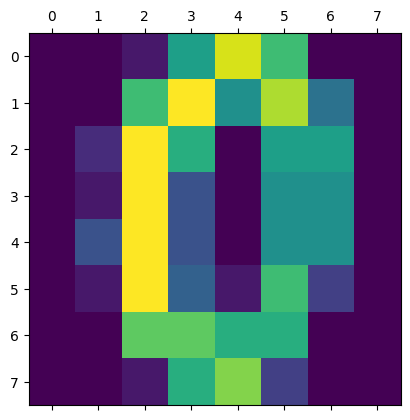

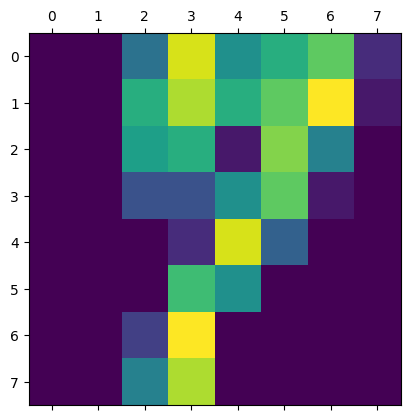

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target
digits.data.shape
plt.matshow(digits.images[10])
plt.matshow(digits.images[472])

In [ ]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

## Project the data into 2 dimensions

We apply 6 techniques for dimensionality reduction onto a 2D plane. The projections of each techique are plotted onto separate graphs and the points are colored based on their labels.

In [ ]:
def apply_reduction(method, **kwargs):
  model = method(**kwargs)
  X_reduced = model.fit_transform(X_normalized)
  return X_reduced

# Applying each technique
lle = apply_reduction(LocallyLinearEmbedding, n_neighbors=200, n_components=2, random_state=0)
tsne = apply_reduction(TSNE, n_components=2, perplexity=50, random_state=0)
isomap = apply_reduction(Isomap, n_neighbors=200, n_components=2)
laplacian = apply_reduction(SpectralEmbedding, n_neighbors=200, n_components=2)
kernel_pca = apply_reduction(KernelPCA, kernel='rbf', gamma=0.01, n_components=2)
pca = apply_reduction(PCA, n_components=2)

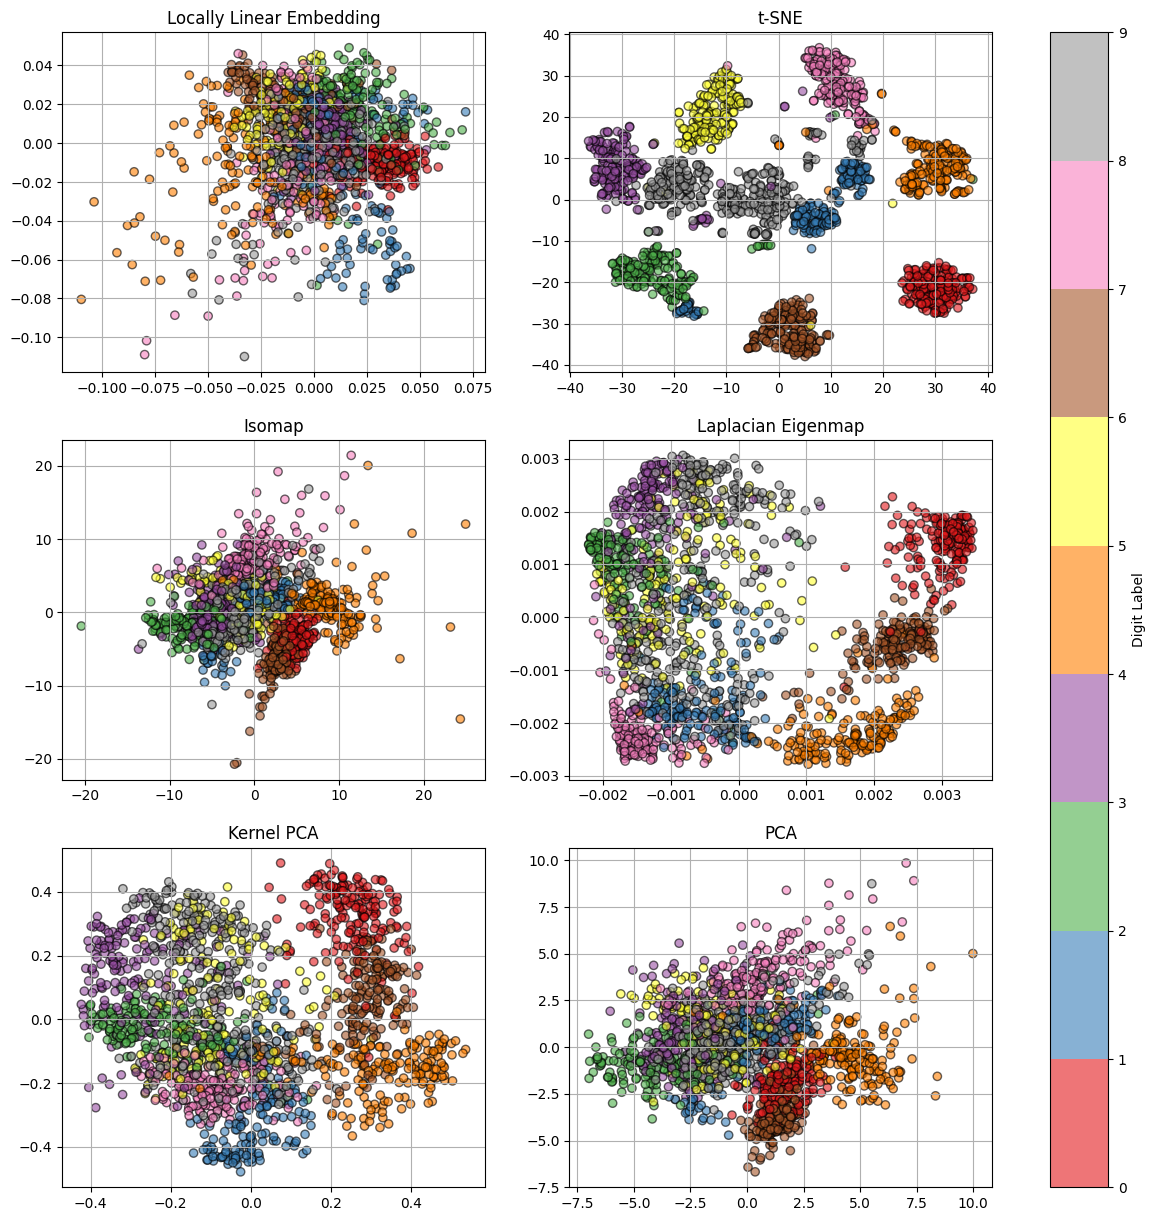

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
techniques = [lle, tsne, isomap, laplacian, kernel_pca, pca]
titles = ['Locally Linear Embedding', 't-SNE', 'Isomap', 'Laplacian Eigenmap', 'Kernel PCA', 'PCA']
metric_scores = {}

for ax, data, title in zip(axs.ravel(), techniques, titles):
  scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap='Set1', edgecolor='k', alpha=0.6)
  ax.set_title(title)
  ax.grid(True)

  # metrics computations
  silhouette = silhouette_score(data, y)
  davies_bouldin = davies_bouldin_score(data, y)
  calinski_harabasz = calinski_harabasz_score(data, y)
  # adjusted_rand = adjusted_rand_score(y, y)
  # normalized_mutual_info = normalized_mutual_info_score(y, y)

  metric_scores[title] = {
      'Silhouette Score': silhouette,
      'Davies-Bouldin Score': davies_bouldin,
      'Calinski-Harabasz Score': calinski_harabasz,
  }

fig.colorbar(scatter, ax=axs.ravel().tolist(), orientation='vertical', label='Digit Label')
plt.show()

In [ ]:
for title, scores in metric_scores.items():
  print(f'\n{title}:')
  for score_name, score_value in scores.items():
    print(f'{score_name}: {score_value}')


Locally Linear Embedding:
Silhouette Score: -0.09516935097944242
Davies-Bouldin Score: 5.325203641797647
Calinski-Harabasz Score: 134.13469301749475

t-SNE:
Silhouette Score: 0.48672837018966675
Davies-Bouldin Score: 0.9962742309462211
Calinski-Harabasz Score: 1546.4928629139113

Isomap:
Silhouette Score: 0.0698841061144252
Davies-Bouldin Score: 3.6739121839837523
Calinski-Harabasz Score: 408.0206910475098

Laplacian Eigenmap:
Silhouette Score: 0.18634596404151116
Davies-Bouldin Score: 1.7018929993195464
Calinski-Harabasz Score: 833.5267161648961

Kernel PCA:
Silhouette Score: 0.08380251725050353
Davies-Bouldin Score: 2.1182749772689142
Calinski-Harabasz Score: 550.2431262748809

PCA:
Silhouette Score: 0.05474148109628961
Davies-Bouldin Score: 6.629090748153402
Calinski-Harabasz Score: 377.9614353368201


In [ ]:
# Ranking
print("Note: these scores were normalized with the range of the values across the respective metrics used.")
for method, metrics in metric_scores.items():
  silhouette_range = max(metric_scores[key]['Silhouette Score'] for key in metric_scores) - min(metric_scores[key]['Silhouette Score'] for key in metric_scores)
  db_range = max(metric_scores[key]['Davies-Bouldin Score'] for key in metric_scores) - min(metric_scores[key]['Davies-Bouldin Score'] for key in metric_scores)
  calinski_range = max(metric_scores[key]['Calinski-Harabasz Score'] for key in metric_scores) - min(metric_scores[key]['Calinski-Harabasz Score'] for key in metric_scores)

  silhouette_normalized = (metrics['Silhouette Score'] - min(metric_scores[key]['Silhouette Score'] for key in metric_scores)) / silhouette_range
  db_normalized = 1 - (metrics['Davies-Bouldin Score'] - min(metric_scores[key]['Davies-Bouldin Score'] for key in metric_scores)) / db_range
  calinski_normalized = (metrics['Calinski-Harabasz Score'] - min(metric_scores[key]['Calinski-Harabasz Score'] for key in metric_scores)) / calinski_range

  combined_score = (silhouette_normalized + db_normalized + calinski_normalized) / 3
  metric_scores[method]['Combined Score'] = combined_score


ranked_methods = sorted(metric_scores.items(), key=lambda x: x[1]['Combined Score'], reverse=True)
for rank, (method, metrics) in enumerate(ranked_methods, start=1):
  print(f'Rank {rank}: {method} (combined score {metrics["Combined Score"]})')

Note: these scores were normalized with the range of the values across the respective metrics used.
Rank 1: t-SNE (combined score 1.0)
Rank 2: Laplacian Eigenmap (combined score 0.6179045219192592)
Rank 3: Kernel PCA (combined score 0.46766515720859503)
Rank 4: Isomap (combined score 0.33406798600400545)
Rank 5: PCA (combined score 0.14342068684341217)
Rank 6: Locally Linear Embedding (combined score 0.07716016208307326)


It can be seen in the scatter plots that t-SNE produced the most distinct separation of clusters out of the 6 methods. All other methods resulted in significant overlap between the different clusters. We proceeded to validate that understanding by using the Silhouette, Davies-Bouldin, and Calinski-Harabasz scores to check out the real metrics. We saw that t-SNE had the highest normalized aggregate score, followed by the Laplacian Eigenmap (Spectral Embedding) and Kernel PCA. Locally Linear Embedding performed the worse out of the six techniques.



## Problem b. Classification with(out) Dimensionality Reduction


We make a pipeline using Standard Scaler, Kernel PCA with sigmoid kernel, and SVC as the classifier. We also make a second pipeline without the Kernel PCA and compare the test accuracy and F1-Score. Note that outside of the Kernel PCA function, both pipelines share the same training/testing data and seed values to ensure that any improvements are due to the presence or absence of the Kernel PCA in the pipeline.

###a. Pipeline with PCA

In [ ]:
seed = 0
seed_svc = 0

print(f"Seed used for train-test split: {seed}")# np.random.randint((2**31)-1)}")
print(f"Seed used for svc: {seed_svc}")# np.random.randint((2**31)-1)}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

#Method 1: Kernel PCA used
pipe_pca = Pipeline([
        ('standard_scaler', StandardScaler()),
        ('kernel_pca', KernelPCA(kernel='sigmoid',n_components=40)),
        ('classifier', SVC(random_state=seed_svc))
    ]
)

pipe_pca.fit(X_train, y_train.ravel())
print(f"Accuracy of pipeline with PCA: {accuracy_score(pipe_pca.predict(X_test),y_test)}")
print(f"F1 Score of pipeline with PCA: {f1_score(pipe_pca.predict(X_test),y_test,average=None)}")


Seed used for train-test split: 0
Seed used for svc: 0
Accuracy of pipeline with PCA: 0.9981481481481481
F1 Score of pipeline with PCA: [1.         1.         1.         1.         0.99065421 1.
 1.         1.         1.         0.99082569]


###b. Pipeline without PCA

In [ ]:
# Method 2: No dimensionality reduction
pipe_nopca = Pipeline([
        ('standard_scaler', StandardScaler()),
        ('classifier', SVC(random_state=seed_svc))
])
pipe_nopca.fit(X_train,y_train.ravel())
print(f"Accuracy of pipeline without PCA: {accuracy_score(pipe_nopca.predict(X_test), y_test)}")
print(f"F1 Score of pipeline without PCA: {f1_score(pipe_nopca.predict(X_test),y_test,average=None)}")


Accuracy of pipeline without PCA: 0.9814814814814815
F1 Score of pipeline without PCA: [1.         0.98181818 0.99047619 0.98148148 0.93693694 1.
 0.97196262 0.99082569 0.97142857 0.99065421]


As demonstrated, the inclusion of kernel PCA in the pipeline resulted in a more accurate classifier as well as a higher F1-Score.

# Comparison of separabiilty of points by different methods

The t-SNE method appeared to be the best at separating the different points into their respective classes.

References:
* https://www.youtube.com/watch?v=P7sxhm6AYjo
* https://www.dropbox.com/scl/fo/3sjixwhdcdgrv5b0iisth/h?dl=0&e=1&preview=Mar+13+-+Linear+Dim+Reduce.mp4&rlkey=d2gsyfotom06erx0jfemcgdw0
* https://www.dropbox.com/scl/fo/3sjixwhdcdgrv5b0iisth/h?dl=0&e=1&preview=Mar+20+-+Nonlinear+Dim+Reduce.mp4&rlkey=d2gsyfotom06erx0jfemcgdw0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

pipeline_kpca_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA(n_components=40, kernel='sigmoid')),
    ('svc', SVC())
])

pipeline_kpca_svc.fit(X_train, y_train)

y_pred = pipeline_kpca_svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("accuracy: ", accuracy)
print("f1: ", f1)

accuracy:  0.9981481481481481
f1:  0.9981479893680871


In [ ]:
data = load_digits()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

pipeline_svc.fit(X_train, y_train)

y_pred_svc = pipeline_svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

accuracy_svc, f1_svc

print("accuracy: ", accuracy_svc)
print("f1: ", f1_svc)

accuracy:  0.9814814814814815
f1:  0.9816138804681078


# Performance comparison of SVC with and without non-linear dimensionality reduction

From the results and the bar-chart shown below, we have shown that the SVC + Kernel PCA has performed better with an accuracy of 99.18% compared to 98.15% accuracy of the SVC without Kernel PCA. In terms of f1 score, the SVC + Kernel PCA has also performed better with 0.99 compared to 0.98 of the SVC.



The reason for this is that the Kernel PCA can enhance the separability of the data by projecting the data into a space where it is more linearly separable by the SVC. This could be really helpful for high-dimensional datasets that exhibit non-linear relationships like handwritten digits. Each handwritten digit is made out of a matrix of pixel values where these values are the darkness or lightness of each pixel. The different parts of a digit can get really complex and highly non-linear and thus would have to rely on non-linear dimensionality reduction techniques like the Kernel PCA in order to achieve high classification performance on the machine learning models that rely on decision boundaries like the SVC. This may as well be the reason why  the linear dimensionality reduction techniques like the Principal Component Analysis (PCA) and the Linear Discriminant Analysis (LDA) strugggled more from our previous machine exercise (MEX4) with the same handwritten digit dataset



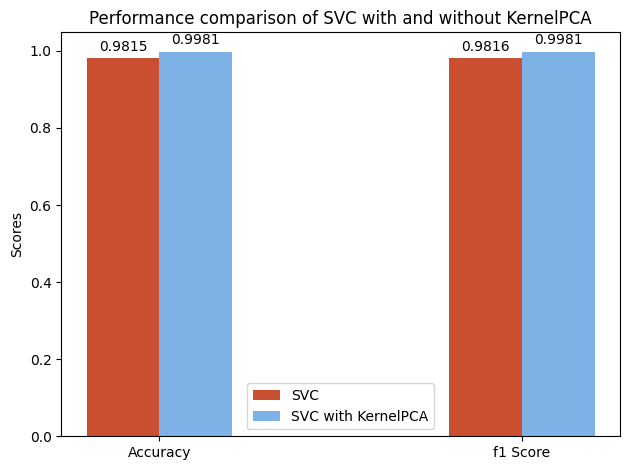

In [ ]:
accuracy_kpca, f1_kpca = accuracy, f1
accuracy_svc, f1_svc

labels = ['Accuracy', 'f1 Score']
svc_scr = [accuracy_svc, f1_svc]
kpca_svc_scr = [accuracy_kpca, f1_kpca]

x = range(len(labels))
width = 0.20

fig, ax = plt.subplots()
rects1 = ax.bar([i - width/2 for i in x], svc_scr, width, label='SVC', color='#c94f30')
rects2 = ax.bar([i + width/2 for i in x], kpca_svc_scr, width, label='SVC with KernelPCA', color='#7eb2e6')

ax.set_ylabel('Scores')
ax.set_title('Performance comparison of SVC with and without KernelPCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()